<a href="https://colab.research.google.com/github/Roi-Mash/Fake-news-detection/blob/main/PA_%2B_NB_%2B_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import pandas as pd
import numpy as np
# Computations
import itertools

# Modelling Algorithm
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC



# Modelling Helpers
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn import metrics

# Ignore warning messages
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

# Visualization
import matplotlib.pyplot as plt

train = pd.read_csv("https://raw.githubusercontent.com/FakeNewsDetection/FakeBuster/master/datasets/train.csv")
test  = pd.read_csv ("https://raw.githubusercontent.com/FakeNewsDetection/FakeBuster/master/datasets/test.csv")
train.head(10)

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
5,5,Jackie Mason: Hollywood Would Love Trump if He...,Daniel Nussbaum,"In these trying times, Jackie Mason is the Voi...",0
6,6,Life: Life Of Luxury: Elton John’s 6 Favorite ...,NaN,Ever wonder how Britain’s most iconic pop pian...,1
7,7,Benoît Hamon Wins French Socialist Party’s Pre...,Alissa J. Rubin,"PARIS — France chose an idealistic, traditi...",0
8,8,Excerpts From a Draft Script for Donald Trump’...,NaN,Donald J. Trump is scheduled to make a highly ...,0
9,9,"A Back-Channel Plan for Ukraine and Russia, Co...",Megan Twohey and Scott Shane,A week before Michael T. Flynn resigned as nat...,0


In [16]:
# Handle missing values
test=test.fillna(' ')
train=train.fillna(' ')
# train=train.dropna()
# test=test.dropna()

In [17]:
# Create a column with all the data available
test['total']=test['title']+' '+test['author']+' '+test['text']
train['total']=train['title']+' '+train['author']+' '+train['text']

train.head()

,id,title,author,text,label,total
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1,House Dem Aide: We Didn’t Even See Comey’s Let...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0,"FLYNN: Hillary Clinton, Big Woman on Campus - ..."
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1,Why the Truth Might Get You Fired Consortiumne...
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1,15 Civilians Killed In Single US Airstrike Hav...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1,Iranian woman jailed for fictional unpublished...


In [18]:
X_train, X_test, y_train, y_test = train_test_split(train['total'], train.label, test_size=0.20, random_state=0)

In [19]:
#Initialize the `tfidf_vectorizer` 
tfidf_vectorizer = TfidfVectorizer(stop_words='english', ngram_range=(1, 2))
#Fit and transform the training data 
tfidf_train = tfidf_vectorizer.fit_transform(X_train)
#Transform the test set 
tfidf_test = tfidf_vectorizer.transform(X_test)

In [20]:
test_tfidf_vector = tfidf_vectorizer.transform(test['total'].values)

In [21]:
# Creating a function that outputs a confusion matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [22]:
def precision_recall(true_label, predicted_label):
    precision = precision_score(true_label, predicted_label)
    print('Precision: %f' % precision)

    recall = recall_score(true_label, predicted_label)
    print('Recall: %f' % recall)
    
    accuracy = metrics.accuracy_score(true_label, predicted_label)
    print('Accuracy: %f' % accuracy)

Precision: 0.989413
Recall: 0.972564
Accuracy: 0.980769


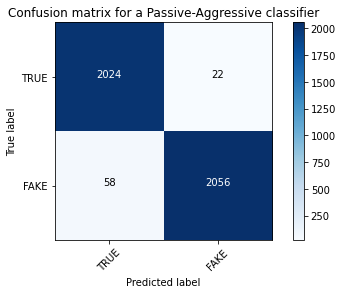

In [23]:




# Let's run Support Vector Machine model
pa_classifier = PassiveAggressiveClassifier(max_iter=1000)
# Training the model
pa_classifier.fit(tfidf_train, y_train)
# Checking the prediction
pred_pa = pa_classifier.predict(tfidf_test)
precision_recall(y_test, pred_pa)

cm2 = metrics.confusion_matrix(y_test, pred_pa, labels=[0,1])
plot_confusion_matrix(cm2, classes=['TRUE','FAKE'], title ='Confusion matrix for a Passive-Aggressive classifier')

Precision: 0.996741
Recall: 0.723273
Accuracy: 0.858173


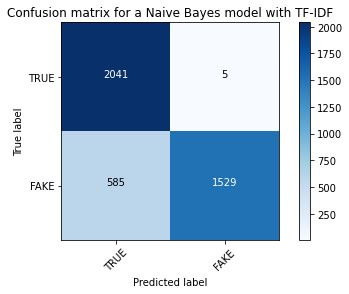

In [24]:
# Let's run Naive Bayes model
nb_classifier = MultinomialNB()
# Training the model
nb_classifier.fit(tfidf_train, y_train)
# Checking the prediction
pred_nb_tfidf = nb_classifier.predict(tfidf_test)
precision_recall(y_test, pred_nb_tfidf)

cm2 = metrics.confusion_matrix(y_test, pred_nb_tfidf, labels=[0,1])
plot_confusion_matrix(cm2, classes=['TRUE','FAKE'], title ='Confusion matrix for a Naive Bayes model with TF-IDF')

Precision: 0.985584
Recall: 0.970199
Accuracy: 0.977644


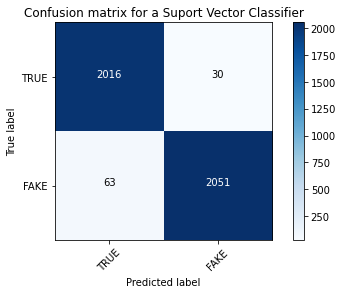

In [25]:
 # Let's run Support Vector Machine model
sv_classifier = SVC(kernel='linear', max_iter=1000)
# Training the model
sv_classifier.fit(tfidf_train, y_train)
# Checking the prediction
pred_sv = sv_classifier.predict(tfidf_test)
precision_recall(y_test, pred_sv)

cm2 = metrics.confusion_matrix(y_test, pred_sv, labels=[0,1])
plot_confusion_matrix(cm2, classes=['TRUE','FAKE'], title ='Confusion matrix for a Suport Vector Classifier')